In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

plt.rcParams["font.sans-serif"] = ["Simhei"]
mpl.rcParams["axes.unicode_minus"] = False

In [4]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [5]:
x= np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x),len(y)))
X, Y = np.meshgrid(x,y)

In [6]:
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

In [12]:
b = -120
w = -4
lr = 0.000005
iteration = 100000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d + b
    loss = np.dot(y_d - y_hat, y_d - y_hat)/m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    b -= lr * grad_b
    w -= lr * grad_w
    
    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：", end-start)

Step 0, w: 1.6534, b: -119.9839, Loss: 3670819.0000
Step 10000, w: 2.4781, b: -121.8628, Loss: 11428.6652
Step 20000, w: 2.4834, b: -123.6924, Loss: 11361.7161
Step 30000, w: 2.4885, b: -125.4716, Loss: 11298.3964
Step 40000, w: 2.4935, b: -127.2020, Loss: 11238.5092
Step 50000, w: 2.4983, b: -128.8848, Loss: 11181.8685
Step 60000, w: 2.5030, b: -130.5213, Loss: 11128.2983
Step 70000, w: 2.5076, b: -132.1129, Loss: 11077.6321
Step 80000, w: 2.5120, b: -133.6607, Loss: 11029.7126
Step 90000, w: 2.5164, b: -135.1660, Loss: 10984.3908
大约需要时间： 1.4079995155334473


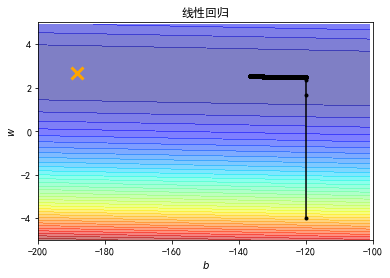

In [13]:
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()

In [24]:
b = -120
w = -4
lr = 1
iteration = 100000

b_history = [b]
w_history = [w]

lr_b=0
lr_w=0
import time
start = time.time()
for i in range(iteration):
    b_grad=0.0
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad-2.0*(y_data[n]-n-w*x_data[n])*1.0
        w_grad= w_grad-2.0*(y_data[n]-n-w*x_data[n])*x_data[n]

    lr_b=lr_b+b_grad**2
    lr_w=lr_w+w_grad**2
    # update param
    b -= lr/np.sqrt(lr_b) * b_grad
    w -= lr /np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)

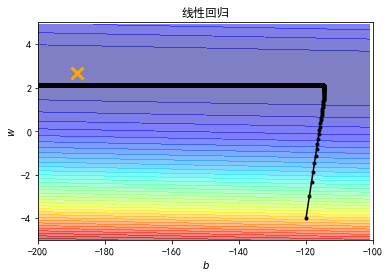

In [23]:
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()